# **Tarea 1. Geometría Computacional y Diferencial**
## Valeria Ferreira Nocua
Agosto 2023

### **Ejercicio 1**
**Write down a code able to identify whether a pair of segments share points.
Three possible answers should be available: segments do not intersect, segments do intersect giving the intersection point, and segments do intersect giving an intersection interval.**


> Importamos las librerías que vamos a usar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from operator import index

from time import sleep
from IPython.display import clear_output

> Definimos la clase point que vamos a utilizar

In [1]:
class Point:
  #constructor
  def __init__(self, x, y, name):
    self.x = x
    self.y = y
    self.name = name

  #metodos de la clase
  def __repr__(self):
    return(f"({self.x}, {self.y})")

  def __str__(self):
    return(self.name)

> Definimos una función para calcular el producto cruz

In [ ]:
def cross(p0, p1, p2): #origen comun, p1 , p2
  return((p1.x - p0.x)*(p2.y- p0.y)- (p2.x - p0.x)*(p1.y-p0.y))

> La función *on_segment* define si un punto ($p_k$) pertenece a un segmento ($p_i, p_j$)



In [ ]:
def on_segment(pi, pj, pk):
  if min(pi.x, pj.x) <= pk.x <= max(pi.x, pj.x) and min(pi.y, pj.y) <= pk.y <= max(pi.y, pj.y):
    return True
  else:
    return False

> Las funciones *cutPoint* y *cutInterval* retornan el punto de corte y el intervalo de corte entre dos segmentos, respectivamente.

In [ ]:

def cutPoint (p0, p1, p2, p3):
  A = np.array([[p0.x - p1.x, p3.x-p2.x], [p0.y-p1.y, p3.y-p2.y]])
  b = np.array([p3.x-p1.x, p3.y-p1.y])
  sol = np.linalg.solve(A,b)
  pc = [sol[0]*p0.x + (1-sol[0])*p1.x, sol[0]*p0.y + (1-sol[0])*p1.y]
  return pc

def cutInterval(p0,p1,p2,p3):
  seg = [p0, p1, p2, p3]
  sorted = []
  min = seg[0]
  ind = 0
  while len(seg) > 0:
    min = seg[0]
    ind = 0
    a = 0
    for i in seg:
      if i.x < min.x:
        ind = a
        min = i
      a += 1
    seg.pop(ind)
    sorted.append(min)
  inter = [sorted[1], sorted[2]]
  return inter

> *segmentsInt* determina si, dados dos segmentos, estos se intersectan, utilizando las funciones definidas anteriormente.

In [ ]:
def segmentsInt (p1, p2, p3, p4):
  #Definimos los productos cruz entre los segmentos
  d1 = cross(p3, p4, p1)
  d2 = cross(p3, p4, p2)
  d3 = cross(p1, p2, p3)
  d4 = cross(p1, p2, p4)
  #Si es una matriz singular, decimos que tienen un intervalo de interseccion


  #Definimos los otros casos donde hay una intersección y retornamos el punto de corte
  if ((d1>0 and d2<0) or (d1<0 and d2>0)) and ((d3>0 and d4<0) or (d3<0 and d4>0)):
    if (p2.x - p1.x)*(p4.y-p3.y) - (p2.y - p1.y)*(p4.x-p3.x) == 0:
      #si es una matriz singular, es decir, si los dos segmentos son colineales, calculamos el intervalo de interseccion
      inter = cutInterval(p1,p2,p3,p4)
      return inter
    else:
      pc = cutPoint(p1,p2,p3,p4)
      return pc
  elif (d1 == 0) and on_segment(p3, p4, p1):
    if (p2.x - p1.x)*(p4.y-p3.y) - (p2.y - p1.y)*(p4.x-p3.x) == 0:
      inter = cutInterval(p1,p2,p3,p4)
      return inter
    else:
      pc = cutPoint(p1,p2,p3,p4)
      return pc
  elif (d2 == 0) and on_segment(p3, p4, p2):
    if (p2.x - p1.x)*(p4.y-p3.y) - (p2.y - p1.y)*(p4.x-p3.x) == 0:
      inter = cutInterval(p1,p2,p3,p4)
      return inter
    else:
      pc = cutPoint(p1,p2,p3,p4)
      return pc
  elif (d3 == 0) and on_segment(p1, p2, p3):
    if (p2.x - p1.x)*(p4.y-p3.y) - (p2.y - p1.y)*(p4.x-p3.x) == 0:
      inter = cutInterval(p1,p2,p3,p4)
      return inter
    else:
      pc = cutPoint(p1,p2,p3,p4)
      return pc
  elif (d4 == 0) and on_segment(p1, p2, p4):
    if (p2.x - p1.x)*(p4.y-p3.y) - (p2.y - p1.y)*(p4.x-p3.x) == 0:
      inter = cutInterval(p1,p2,p3,p4)
      return inter
    else:
      pc = cutPoint(p1,p2,p3,p4)
      return pc
  # Si no cumple con ninguno de estos casos, no hay intersección
  else:
    return None

> Finalmente, *intersections* grafica los segmentos y retorna si hay o no intersección, y el punto de corte o intervalo de corte dado el caso.

In [ ]:
def intersections(s1,s2):
  plt.figure(figsize = (3,3))
  # Asi se grafica :)
  plt.scatter(s1[0].x, s1[0].y, marker = '.', color = 'darkorange')

  plt.scatter(s2[0].x, s2[0].y, marker = 'x', color = 'limegreen')
  plt.scatter(s1[1].x, s1[1].y, marker = '.', color = 'darkorange')
  plt.scatter(s2[1].x, s2[1].y, marker = 'x', color = 'limegreen')

  plt.arrow(s1[0].x, s1[0].y, s1[1].x - s1[0].x, s1[1].y - s1[0].y, head_width = 0.05, head_length = 0.05,
            color = "darkorange")
  plt.arrow(s2[0].x, s2[0].y, s2[1].x - s2[0].x, s2[1].y - s2[0].y, head_width = 0.05, head_length = 0.05,
            color = "limegreen")


  r = segmentsInt(s1[0], s1[1], s2[0], s2[1])
  if r is not None:
    print("Hay una intersección")
    if len(r) == 1:
      print("El punto es", r)
    else:
      print("El intervalo es", r)
  else:
    print("No hay intersecciones")
 # plt.scatter(r[1][0], r[1][1])
  plt.show()

> Probamos el algoritmo con los segmentos dados:

Hay una intersección
El intervalo es [(3, 4), (3, 4)]


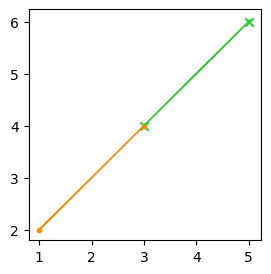

In [ ]:
s1 = [Point(1,2, 'p1'), Point(3,4, 'p2')]
s2 = [Point(3,4,'p3'), Point(5,6,'p4')]
s3 = [Point(2,3, 'p1'), Point(5,6, 'p2')]
s4 = [Point(4,5,'p3'), Point(5,6,'p4')]
intersections(s1,s2)

Hay una intersección
El intervalo es [(2, 3), (3, 4)]


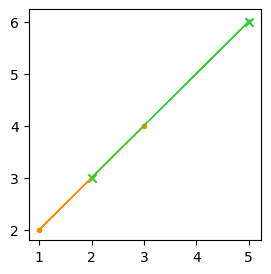

In [ ]:
intersections(s1,s3)

No hay intersecciones


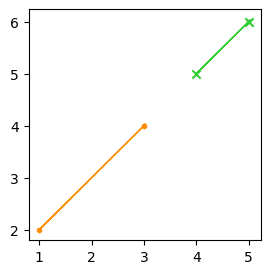

In [ ]:
intersections(s1,s4)

### **Ejercicio 2**
**Generate a set of points using the following code:**

In [ ]:
np.random.seed(23)
x = np.random.rand(20,2)
x

array([[5.17297884e-01, 9.46962604e-01],
       [7.65459759e-01, 2.82395844e-01],
       [2.21045363e-01, 6.86222085e-01],
       [1.67139203e-01, 3.92442466e-01],
       [6.18052347e-01, 4.11930095e-01],
       [2.46488120e-03, 8.84032182e-01],
       [8.84947538e-01, 3.00409689e-01],
       [5.89581865e-01, 9.78426916e-01],
       [8.45093822e-01, 6.50754391e-02],
       [2.94744465e-01, 2.87934441e-01],
       [8.22466339e-01, 6.26183038e-01],
       [1.10477714e-01, 5.28811169e-04],
       [9.42166233e-01, 1.41500758e-01],
       [4.21596526e-01, 3.46489440e-01],
       [8.69785084e-01, 4.28601812e-01],
       [8.28751484e-01, 7.17851838e-01],
       [1.19226694e-01, 5.96384173e-01],
       [1.29756298e-01, 7.75340917e-02],
       [8.31205256e-01, 4.64385615e-01],
       [1.62012479e-01, 5.47975292e-01]])

In [ ]:
Points = x.tolist()


- **Implement the Jarvis-March algorithm for the generated points. Illustrate the process with plots.**

> Implementamos una función que nos ayude a encontrar el punto más hacia la izquierda, que será el punto con el que iniciaremos el algoritmo.

In [ ]:
def firstPoint(Points):
  pc = Points.copy()
  min = pc[0]
  points = pc[1:]
  for i in points:
    if i[0] < min[0]:
      min = i
    elif i[0] == min[0] and i[1] < min[1]:
      min = i
  return min

> La función *orientation* nos identifica si hubo un giro a izquierda, a derecha o los puntos son colineares

In [ ]:
def orientation(p0, p1, p2): #origen comun, p1 , p2
  cross = ((p1[0] - p0[0])*(p2[1]- p0[1])- (p2[0] - p0[0])*(p1[1]-p0[1]))
  if cross == 0:
    return 0 #colineares
  elif cross > 0:
    return 1 #derecha
  else:
    return 2 #izquierda

In [ ]:
def JarvisMarch(Points):
  min = firstPoint(Points)
  points = []
  for i in range(len(Points)):
    if Points[i][0] != min[0] and Points[i][1]!=min[1]:
      points.append(Points[i]) #añadimos los puntos diferentes al inicial a otra lista


  n = len(Points)
  hull = []
  actualp = min
  nextp = actualp
  count = 0

  while True:
    actualp = nextp
    hull.append(actualp) #Añadimos a la envolvente el punto
    nextp = points[0]
    for p in Points:
      if p == actualp or p == nextp:
        continue

      elif orientation(actualp, p, nextp) == 2: #si el punto esta a la izquierda
        #graficamos
        clear_output(wait = True)
        plt.scatter([p[0] for p in Points], [p[1] for p in Points], color = 'limegreen')
        plt.plot([p[0] for p in hull], [p[1] for p in hull], color = 'limegreen')
        plt.scatter(actualp[0], actualp[1], color = 'pink')
        plt.plot([actualp[0], p[0]], [actualp[1], p[1]], color = 'pink')
        plt.title('Jarvis March Algorithm Process')
        plt.grid(True)
        plt.show()
        sleep(.05) #esta línea ayuda que se muestre en una sola gráfica, a estilo de video
        nextp = p

    count += 1

    if actualp == min and count != 1:
      break
  #graficamos el polígono convexo resultante
  plt.scatter([p[0] for p in Points], [p[1] for p in Points], color = 'limegreen')
  plt.plot([p[0] for p in hull], [p[1] for p in hull], color = 'limegreen')
  plt.title('Jarvis March Algorithm')
  plt.grid(True)
  plt.show()

  return ('hull', hull)




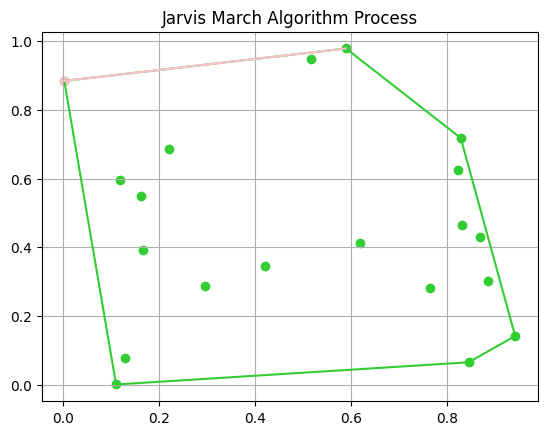

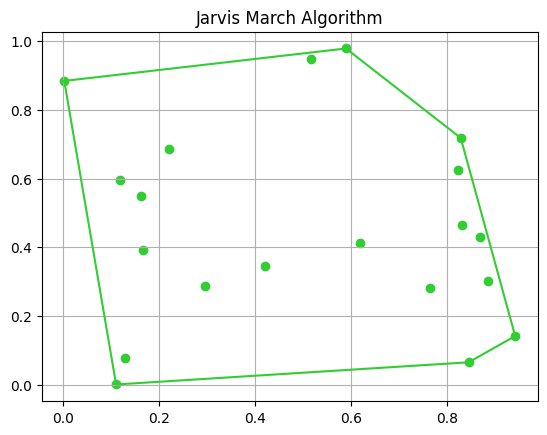

('hull',
 [[0.002464881200886171, 0.8840321823721048],
  [0.5895818652147146, 0.9784269160148309],
  [0.8287514843227557, 0.7178518382260383],
  [0.9421662328554996, 0.14150075772518977],
  [0.8450938221263111, 0.06507543905719348],
  [0.11047771391367378, 0.0005288111692760555],
  [0.002464881200886171, 0.8840321823721048]])

In [ ]:
JarvisMarch(Points)

- **Which models could be implemented by the convex hull algorithm? Which systems could be described by the model? In those cases, what do represent the points and the hull?**

> Como tal, este algoritmo llega al propósito de la envolvente convexa, sin embargo, es más costoso a nivel computacional dado que tiene que revisar todos los posibles puntos, lo que lo hace más complejo. Podría implementarse que si o si solo mire los giros a la izquierda.
>
> Los sistemas que pueden ser descritos por el modelo, podrían ser:
> * Información geográfica: los puntos reprecentan coordenadas de ciudades, lugares turísticos y la envolvente convexa podría ser la representación de los límites externos de ciudades
> * Clustering para análisis de datos: Los puntos representan los datos dados a analizar y la envolvente sería ya lo que encierra el clúster de los puntos más cercanos.
>
> Podemos decir que, este algoritmo podría servir para optimizar, simplificar y analizar dependiendo de la aplicación que se le de al algoritmo.


### **Ejercicio 3**
**Implement the *Sweep line algorithm* and apply it to the set of segments given in the attached file (segmentos.csv). Identify intersection points and intersecting segments. Plot the process and the result.**

> Para facilidad del ejercicio, crearemos una clase que se denomine segmento y sus atributos sean los puntos.

In [2]:
class Segment:
  def __init__(self, startp, endp):
    self.startp = startp
    self.endp = endp

  def __str__(self):
    return(f"(Punto inicial: {self.startp}, Punto final: {self.endp})")

> Creamos los segmentos dados por el ejercicio

In [ ]:
s1 = Segment(Point(0.517, 0.947, 'p1'), Point(0.765, 0.282, 'p2'))
s2 = Segment(Point(0.221, 0.686, 'p3'), Point(0.167, 0.392, 'p4'))
s3 = Segment(Point(0.618, 0.412, 'p5'), Point(0.002, 0.884, 'p6'))
s4 = Segment(Point(0.885, 0.3, 'p7'), Point(0.59, 0.978, 'p8'))
s5 = Segment(Point(0.845, 0.065, 'p9'), Point(0.295, 0.288, 'p10'))
s6 = Segment(Point(0.822, 0.626, 'p11'), Point(0.11, 0.001, 'p12'))
s7 = Segment(Point(0.942, 0.142, 'p13'), Point(0.422, 0.346, 'p14'))
s8 = Segment(Point(0.87, 0.429, 'p15'), Point(0.829, 0.718, 'p16'))
s9 = Segment(Point(0.119, 0.596, 'p17'), Point(0.13, 0.078, 'p18'))
s10 = Segment(Point(0.831, 0.464, 'p19'), Point(0.162, 0.548, 'p20'))

seg = [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10]


> Graficamos los puntos:

In [ ]:
def plot_seg (seg):
  for i in seg:
    xcoor = [i.startp.x, i.endp.x]
    ycoor = [i.startp.y, i.endp.y]

    plt.plot(xcoor, ycoor, marker = '.')
    plt.grid(True)
    plt.title('Segments')


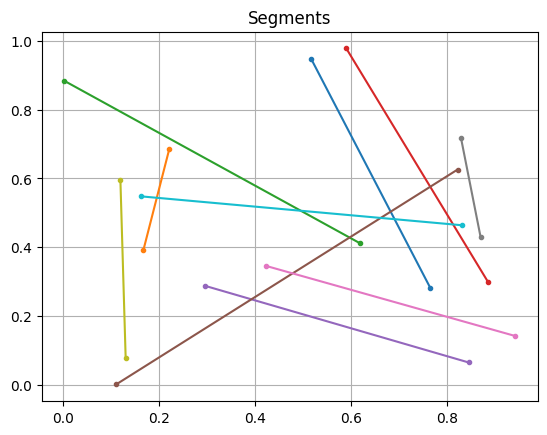

In [ ]:
plot_seg(seg)

> Definimos la función que determina si hay o no una intersección

In [ ]:
def find_inter (p1, p2, p3, p4):
  #Definimos los productos cruz entre los segmentos
  d1 = cross(p3, p4, p1)
  d2 = cross(p3, p4, p2)
  d3 = cross(p1, p2, p3)
  d4 = cross(p1, p2, p4)
  #Definimos los otros casos donde hay una intersección y retornamos el punto de corte
  if ((d1>0 and d2<0) or (d1<0 and d2>0)) and ((d3>0 and d4<0) or (d3<0 and d4>0)):
    pc = cutPoint(p1,p2,p3,p4)
    return pc
  elif (d1 == 0) and on_segment(p3, p4, p1):
    pc = cutPoint(p1,p2,p3,p4)
    return pc
  elif (d2 == 0) and on_segment(p3, p4, p2):
    pc = cutPoint(p1,p2,p3,p4)
    return pc
  elif (d3 == 0) and on_segment(p1, p2, p3):
    pc = cutPoint(p1,p2,p3,p4)
    return pc
  elif (d4 == 0) and on_segment(p1, p2, p4):
    pc = cutPoint(p1,p2,p3,p4)
    return pc
  # Si no cumple con ninguno de estos casos, no hay intersección
  else:
    return None

> Creamos una función que guarde los puntos de intersección y los grafique

In [ ]:
def sweep(segments):
    events = []

    # Recorre todos los segmentos
    for i in range(len(segments)):
        for j in range(i + 1, len(segments)):  # Comenzamos desde i + 1 para evitar comparar un segmento consigo mismo
            inter = find_inter(segments[i].startp, segments[i].endp, segments[j].startp, segments[j].endp)
            if inter is not None:
                events.append(inter)


    plot_seg(segments)
    for i in events:
        plt.scatter(i[0], i[1], marker='x', color='black')
    plt.show()

    return 'Hay intersección en: ', events

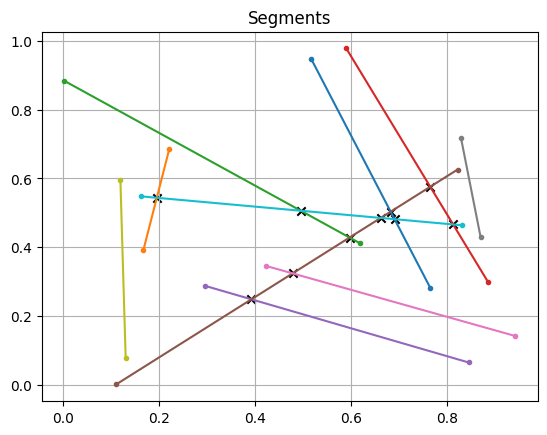

('Hay intersección en: ',
 [[0.6824084394093686, 0.503465273357943],
  [0.6905496459169018, 0.4816350220373397],
  [0.194894444941408, 0.5438697557921103],
  [0.5967554391843165, 0.42827829984578347],
  [0.4950911735296791, 0.5061768930097265],
  [0.7649470178126279, 0.5759183794001298],
  [0.8126400296640407, 0.4663052877551877],
  [0.3921003490366668, 0.24863022211786054],
  [0.4779976863272145, 0.32403167690240037],
  [0.6616702801438695, 0.4852611307442675]])

In [ ]:
sweep(seg)